<a href="https://colab.research.google.com/github/omar-ahmd/OpenCv_Workshop/blob/main/2_Image_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Get images to work with**

In [ ]:
!curl -o nature.jpg 'https://www.arknature.org/wp-content/uploads/2019/05/nature-header.jpg'
!curl -o cat.jpg 'https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg?w=590&h=800&62C6A28D-D2CA-4635-AA7017C94E6DDB72'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1297k  100 1297k    0     0   980k      0  0:00:01  0:00:01 --:--:--  980k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18069  100 18069    0     0   161k      0 --:--:-- --:--:-- --:--:--  161k


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

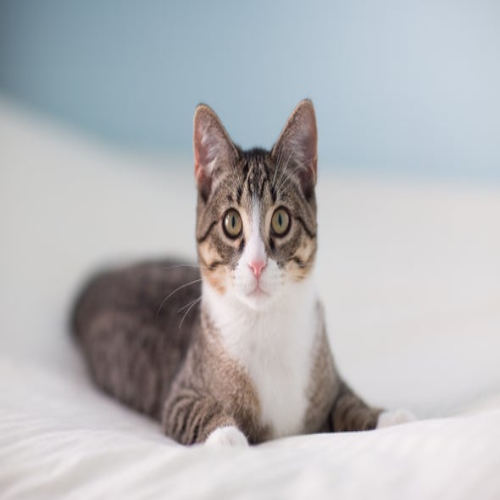

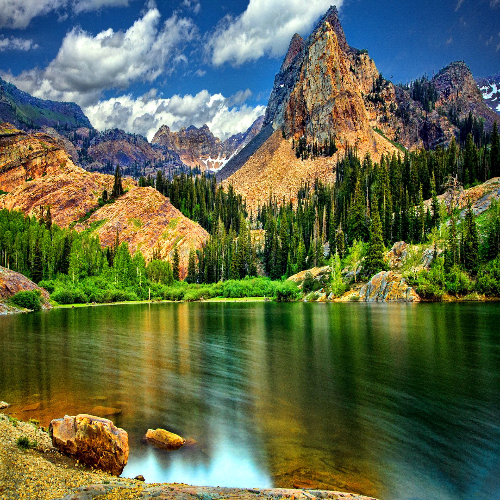

In [ ]:
catpath = 'cat.jpg'
naturepath = 'nature.jpg'

img1 = cv2.imread(catpath)
img1 = cv2.resize(img1,(500,500))

img2 = cv2.imread(naturepath)
img2 = cv2.resize(img2,(500,500))

cv2_imshow(img1)
cv2_imshow(img2)

# Arithmetic Operations on Images

## Accessing and Modifying pixel values

In [ ]:
px = img1[100,100] 
print(px)

[181 169 145]


In [ ]:
# accessing only blue pixel 
blue = img1[100,100,0]
print(blue)

181


In [ ]:
# You can modify the pixel values the same way.
for i in range(100):
  img1[i,i] = [255,255,255]


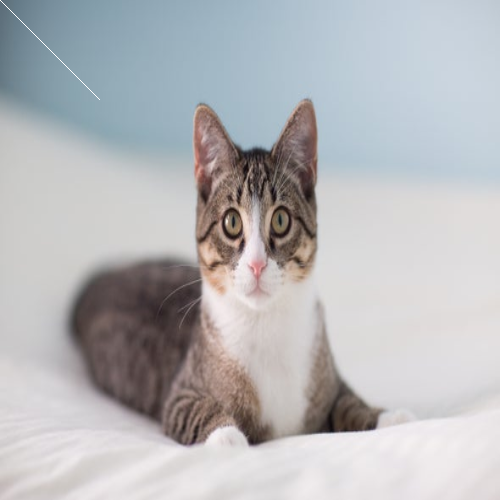

In [ ]:
cv2_imshow(img1)

## Splitting and Merging Image Channels

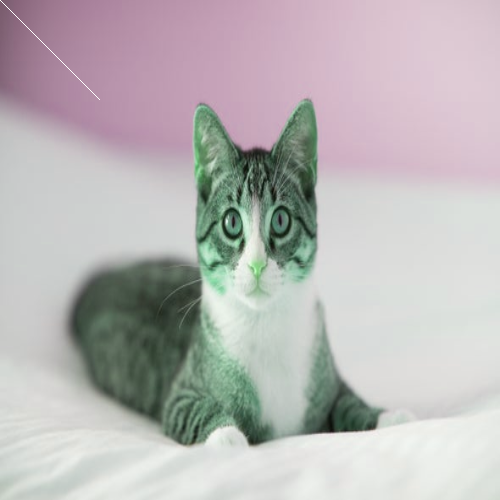

In [ ]:
b,g,r = cv2.split(img1)

img = cv2.merge((g,r,b))

cv2_imshow(img)

## Image Addition

You can add two images by OpenCV function, `cv2.add()` or simply by numpy operation, res = img1 + img2. Both images should be of same depth and type, or second image can just be a scalar value.

**cv2.add(img1,img2) VS img1+img2**

In [ ]:
x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x,y))


print(x+y)   

[[255]]
[4]


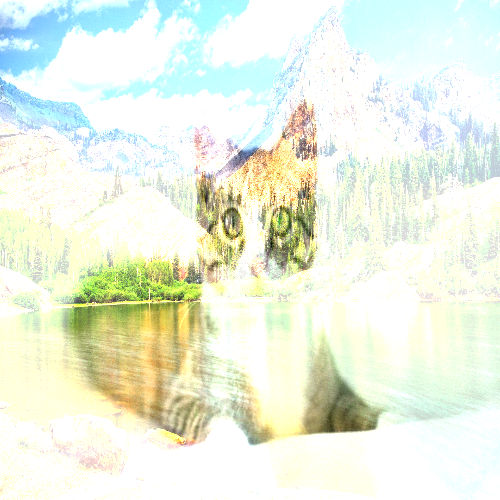

In [ ]:
# add images
res = cv2.add(img1, img2)

# show result
cv2_imshow(res)

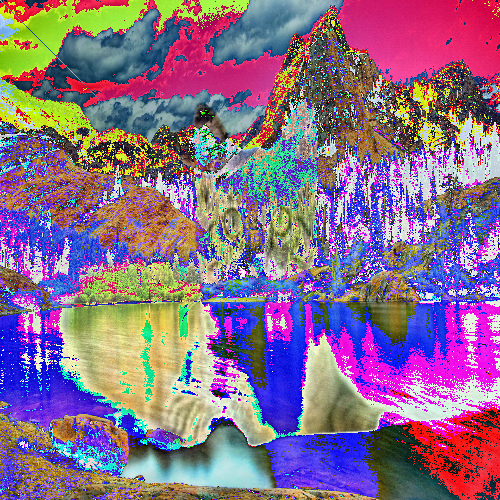

In [ ]:
res = img1 + img2
cv2_imshow(res)

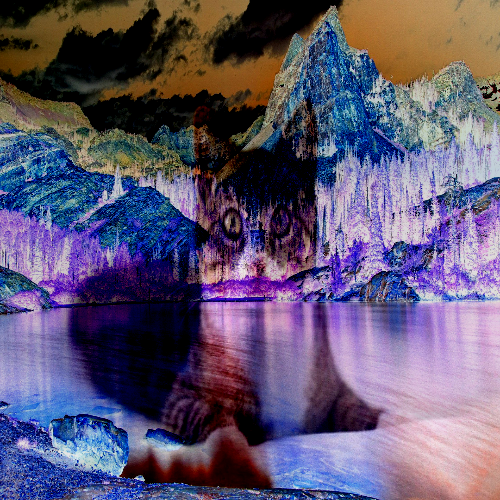

In [ ]:
# subtract images
res = cv2.subtract(img1, img2)

# show result
cv2_imshow(res)

## Image Blending

This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency.

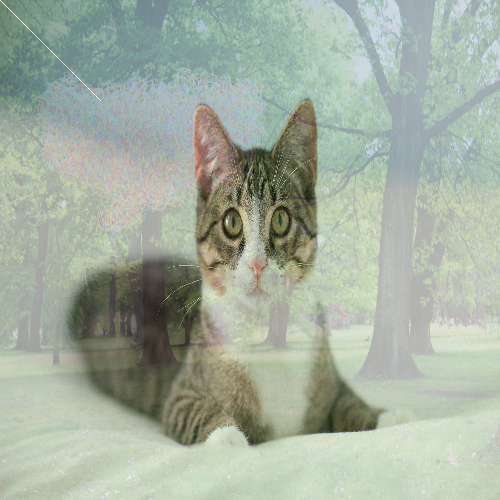

In [ ]:
blending = cv2.addWeighted(img1, 0.8, img2, 0.2, 0)
cv2_imshow(blending)

### Rotation


[[ 6.12323400e-17  1.00000000e+00 -2.84217094e-14]
 [-1.00000000e+00  6.12323400e-17  5.00000000e+02]]


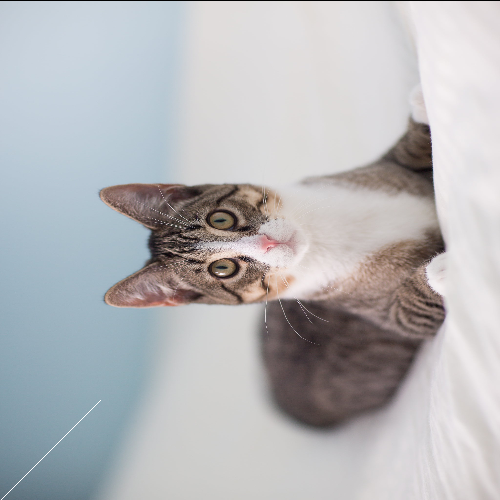

In [ ]:
height = img1.shape[0]
width = img1.shape[1]

center = (width / 2, height / 2)

angle90 = 90
angle180 = 180
angle270 = 270
 
scale = 1
 
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = cv2.getRotationMatrix2D(center, angle90, scale)
print(M)
rotated = cv2.warpAffine(img1, M, (500,500))

cv2_imshow(rotated)

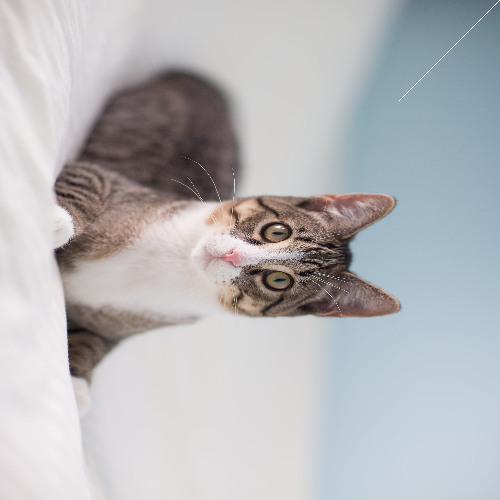

In [ ]:
# an easier way :)

rot90 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
cv2_imshow(rot90)

### Translation

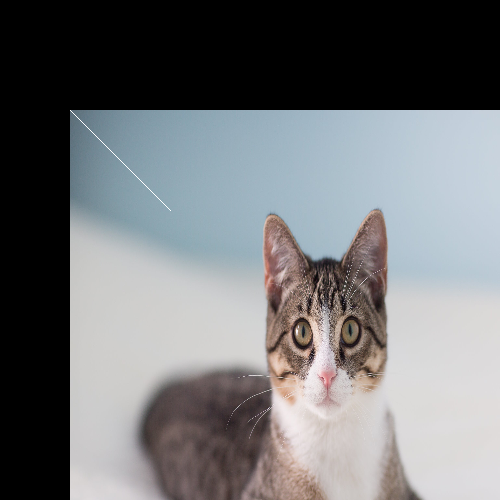

In [ ]:
import numpy as np

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img1, translation_matrix, (width, height))

cv2_imshow(img_translation)